# CVPR - Assignment 1 
# Bojana Počuča and Marco Nobile

### Imports:

In [1]:
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
import matplotlib.pyplot as plt
from scipy.linalg import null_space
from numpy import linalg 
from numpy import cross
import random
%matplotlib inline
from math import pi, cos, sin

# Single View Geometry A: (10 pts) 
### <br>● Task1: <br><br>Estimate the transformation that maps points from the pitch layout __S__ to the image __I__


First, we load image S and image I:

In [2]:
image_S = plt.imread('S.png')
# plt.imshow(image_S)

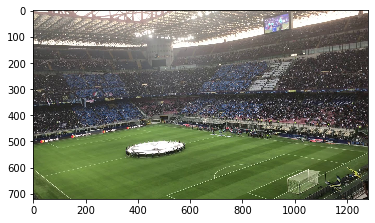

In [3]:
image_I = plt.imread('I.png')
plt.imshow(image_I);

## DRAWING UTILS:

In [4]:
def draw_line(point1 ,point2, options = 'r-'):
    '''draw lines with points'''
    x_values = [point1[0], point2[0]]
    y_values = [point1[1], point2[1]]
    
    plt.plot(x_values, y_values, options)
    return cross(point1, point2)

def draw_line_line(line, options = 'r'): 
    '''draw lines with angular coeff and intercept'''
    x = np.linspace(0,1400,1000)
    y =-(line[0]/line[1])*x-(line[2]/line[1]) 
    plt.plot(x, y, '-r')

def draw_circle(x_o, y_o, radius):
    n = 1200
    t = np.linspace(0, 2*np.pi, n+1)
    x = radius * np.cos(t)+ x_o # center it!
    y = radius * np.sin(t)+ y_o
    plt.plot(x, y)

    return np.array([x,y]) 
    
def draw_ellipse(x_o, y_o , t_rot, a, b):
    '''
    Parameters:
        x_o : x-position of the center
        y_o : y-position of the center
        a : radius on the x-axis
        b : radius on the y-axis
        t_rot : rotation of the ellipse
    '''
    
    u = x_o # x-position of the center
    v = y_o # y-position of the center

    t = np.linspace(0, 2*pi, 1200)
    Ell = np.array([a*np.cos(t) , b*np.sin(t)])  

    R_rot = np.array([[cos(t_rot) , -sin(t_rot)],[sin(t_rot) , cos(t_rot)]])  
    Ell_rot = np.zeros((2,Ell.shape[1]))
    for i in range(Ell.shape[1]):
        Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])
    plt.plot( u+Ell_rot[0,:] , v+Ell_rot[1,:],'red' )    


We begin by saving the coordinates of 4 points correspondencies that will be used for the Homography estimation, as well as the coordinates of all the other points (defined by line intersections) from the __image S__ (i.e. the pitch).

In [5]:
### POINTS FROM S: ###

# A,B,C,D: the 4 points that we are going to use for the estimation of Homography H:
# the points are in the format [x,y,1]
A = np.array([576, 731, 1])
B = np.array([575, 52, 1])
C = np.array([935, 190, 1])
D = np.array([935, 593, 1])

#### all the other points defined by intersection of lines (used for drawings)#####
E = np.array([50, 50, 1])
F = np.array([50, 731, 1])
G = np.array([1100, 51, 1])
I = np.array([1101, 729, 1])
L = np.array([50, 189, 1])
M = np.array([50, 593, 1])
N = np.array([214, 189, 1])
O = np.array([215, 593, 1])
P = np.array([104, 299, 1])
Q = np.array([105, 484, 1])
R = np.array([1101, 190, 1])
S = np.array([1101, 593, 1])
T = np.array([1045, 300, 1])
U = np.array([1046, 483, 1])
V = np.array([51, 300, 1])
W = np.array([51, 483, 1])
J = np.array([1100, 301, 1])
Y = np.array([1100, 483, 1])

# Center of the circle on the half-way line of the pitch:
Z = np.array([576, 391, 1])


Having all the points, now we can plot the lines of the original pitch S as well as the central circle:

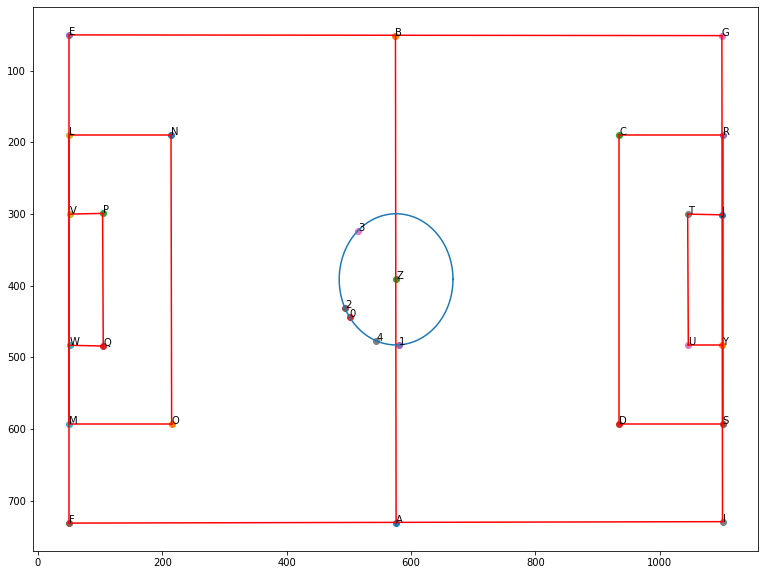

In [6]:
fig, ax = plt.subplots(figsize = (13, 10))

# vertical lines

draw_line(A, B)
draw_line(I, G)
draw_line(F, E)
draw_line(M, L)
draw_line(S, R)
draw_line(O, N)
draw_line(D, C)
draw_line(Q, P)
draw_line(U, T)

# horizontal lines

draw_line(E, G)
draw_line(F, I)
draw_line(M, O)
draw_line(L, N)
draw_line(C, R)
draw_line(D, S)
draw_line(V, P)
draw_line(W, Q)
draw_line(T, J)
draw_line(U, Y)

# scatter the points + annotate point names

plt.annotate('A', A[:2])
plt.scatter(A[0], A[1])
plt.annotate('B', B[:2])
plt.scatter(B[0], B[1])
plt.annotate('C', C[:2])
plt.scatter(C[0], C[1])
plt.annotate('D', D[:2])
plt.scatter(D[0], D[1])
plt.annotate('E', E[:2])
plt.scatter(E[0], E[1])
plt.annotate('F', F[:2])
plt.scatter(F[0], F[1])
plt.annotate('G', G[:2])
plt.scatter(G[0], G[1])
plt.annotate('I', I[:2])
plt.scatter(I[0], I[1])
plt.annotate('L', L[:2])
plt.scatter(L[0], L[1])
plt.annotate('M', M[:2])
plt.scatter(M[0], M[1])
plt.annotate('N', N[:2])
plt.scatter(N[0], N[1])
plt.annotate('O', O[:2])
plt.scatter(O[0], O[1])
plt.annotate('P', P[:2])
plt.scatter(P[0], P[1])
plt.annotate('Q', Q[:2])
plt.scatter(Q[0], Q[1])
plt.annotate('R', R[:2])
plt.scatter(R[0], R[1])
plt.annotate('S', S[:2])
plt.scatter(S[0], S[1])
plt.annotate('U', U[:2])
plt.scatter(U[0], U[1])
plt.annotate('T', T[:2])
plt.scatter(T[0], T[1])
plt.annotate('V', V[:2])
plt.scatter(V[0], V[1])
plt.annotate('W', W[:2])
plt.scatter(W[0], W[1])
plt.annotate('J', J[:2])
plt.scatter(J[0], J[1])
plt.annotate('Y', Y[:2])
plt.scatter(Y[0], Y[1])
plt.annotate('Z', Z[:2])
plt.scatter(Z[0], Z[1])

radius = 1050*0.08714285714 #radius = 9.15 mt = 1051*0.087
circle_points = draw_circle(Z[0], Z[1], radius = radius) # circle_points: set of points that lie on the circle 

# here we take 5 random points from the circle 
five_rnd_points = [482, 290, 514, 759, 368] # [random.randint(0,1200) for _ in range(5)]

list_points_circle = []
for idx in five_rnd_points:
    list_points_circle.append(np.append(circle_points.T[idx,:], 1.)) # 

# and now we plot the 5 points that we are going to use to fit the conic
for i, point in enumerate(list_points_circle):
    plt.annotate(f'{i}', point[:2])
    plt.scatter(point[0], point[1])
    
# with this line we compensate for changes in the coordinate systems in matplotlib
ax.invert_yaxis() 


Then we select the points A,B,C and D from the __image I__ such that we can have the 4 pairwise point correspondecies needed to estimate the Homography:

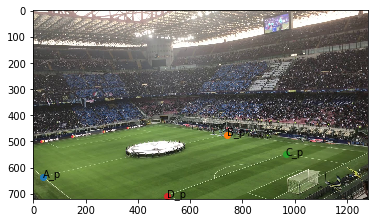

In [7]:
### POINTS FROM I ###

A_p = np.array([37, 636, 1])
B_p = np.array([742, 474, 1])
C_p = np.array([965, 550, 1])
D_p = np.array([512, 709, 1])


plt.annotate('A_p', A_p[:2])
plt.scatter(A_p[0], A_p[1])
plt.annotate('B_p', B_p[:2])
plt.scatter(B_p[0], B_p[1])
plt.annotate('C_p', C_p[:2])
plt.scatter(C_p[0], C_p[1])
plt.annotate('D_p', D_p[:2])
plt.scatter(D_p[0], D_p[1])
plt.imshow(image_I);
# the selected points

In [8]:
# we save the points into 2 lists that we cast into np.arrays
pts_pitch = [A, B, C, D] # from img(S)
X = np.array(pts_pitch).T # from img(S)

pts_image = [A_p, B_p, C_p, D_p] # from img(I)
X_p = np.array(pts_image).T # from img(I)

'''
first row : x-coord
second row : y-coord
third row : z-coord
'''

print('X: points from S with column-wise coords:')
print(X, 'shape:', X.shape)
print('\n')
print('X_p: points from I with column-wise coords:')
print(X_p, 'shape', X_p.shape)

X: points from S with column-wise coords:
[[576 575 935 935]
 [731  52 190 593]
 [  1   1   1   1]] shape: (3, 4)


X_p: points from I with column-wise coords:
[[ 37 742 965 512]
 [636 474 550 709]
 [  1   1   1   1]] shape (3, 4)


Since we are working in $P^{2}$ the z coord = 1. <br>

Let's define the transformation that maps points from the __pitch layout S__ to the __image I__ as:<br>
$$x' = Hx$$
<br>
Furthermore we can define H as:<br>
$$ 
H = \begin{bmatrix}
    A & \textbf{t} \\
    \textbf{$v^{T}$} & v 
    \end{bmatrix}
$$<br>
with  𝑣 = [𝑣1; 𝑣2] and 𝑣 ∈ R (possibly zero), rotation matrix _A_ and the translation vector _t_.<br>

In our case then we have that:
$$I = HS$$
and thus:
    - x'(X_p) -> points from the image I
    - x (X)   -> points from the image S 
<br>
Knowing that a Homography transformation has 8 DOF, we need _4 point correspondencies_ to estimate H using the _DLT_ algorithm. We do so by a design matrix, of shape _2n × 9_ (in our case n=4) for which the following should hold:
$$A𝒉 = 𝟎$$

where A is the matrix obtained by applying and algebraic trick to move from the cross product to a linear matrix multiplication, that allows us to build an homogeneous system.
The vector $h$ is then the RNS(A).

In [9]:
def build_matrix_A(X, X_p, preconditioning = False):
    A = None 
    
    for i in range(X.shape[1]): 
        if preconditioning:
            term0 = np.zeros((1,3)) 
        else:
            term0 = np.zeros(3) 
        term1 = 1*X[:, i].T 
        term2 = X_p[1,i]*X[:, i].T 
        term3 = X_p[0,i]*X[:, i].T 
        first_row = np.hstack([term0, -term1, term2])
        second_row = np.hstack([term1, term0, -term3])
        matrix_A = np.vstack([first_row, second_row])

        if i == 0:
            A = matrix_A
        else:
            A = np.vstack([A, matrix_A])
    return A

In [10]:
A_ = build_matrix_A(X, X_p, preconditioning = False)

print('Design matrix A:')
A_

Design matrix A:


array([[ 0.00000e+00,  0.00000e+00,  0.00000e+00, -5.76000e+02,
        -7.31000e+02, -1.00000e+00,  3.66336e+05,  4.64916e+05,
         6.36000e+02],
       [ 5.76000e+02,  7.31000e+02,  1.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00, -2.13120e+04, -2.70470e+04,
        -3.70000e+01],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, -5.75000e+02,
        -5.20000e+01, -1.00000e+00,  2.72550e+05,  2.46480e+04,
         4.74000e+02],
       [ 5.75000e+02,  5.20000e+01,  1.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00, -4.26650e+05, -3.85840e+04,
        -7.42000e+02],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, -9.35000e+02,
        -1.90000e+02, -1.00000e+00,  5.14250e+05,  1.04500e+05,
         5.50000e+02],
       [ 9.35000e+02,  1.90000e+02,  1.00000e+00,  0.00000e+00,
         0.00000e+00,  0.00000e+00, -9.02275e+05, -1.83350e+05,
        -9.65000e+02],
       [ 0.00000e+00,  0.00000e+00,  0.00000e+00, -9.35000e+02,
        -5.93000e+02, -1.00000

Once we have built the matrix A we can now retrieve H by eather:
    - decomposing it using the SVD (A = UDV.T) or 
    - H = RNS(A) (using the null_space function)
where H (in case of former) corresponds to the last column of $V$ (or the last row of $V^{T}$), or (in the case of latter) H is the right null space of the matrix A. <br>
Recalling that _np.linalg.svd_ returns vh which is $V^{T}$:

In [11]:
def estimate_homography(matrix_A):
    
    # h = null_space(matrix_A)
    u, s, vh  = np.linalg.svd(matrix_A) # nb vh is V^T
    
    h = vh[-1, :].T # equal to V = vh.T; V[:,-1]
    H = h.reshape((3,3))
    
    # check: A*h=0
    assert(np.abs((matrix_A @ h).sum()) < 1E-3)
    # check: ||h||=1
    assert((np.linalg.norm(h,2) - 1.0) < 1E-3)

    return H

In [12]:
H = estimate_homography(A_)

# printing both the solutions

print('Homography H:')
print(np.around(H, decimals = 3)) 
print('\n')
print('RNS solution:\n', np.around(null_space(A_),3))

Homography H:
[[-0.     0.001 -0.745]
 [ 0.     0.    -0.667]
 [ 0.     0.    -0.002]]


RNS solution:
 [[-0.   ]
 [ 0.001]
 [-0.745]
 [ 0.   ]
 [ 0.   ]
 [-0.667]
 [ 0.   ]
 [ 0.   ]
 [-0.002]]


Given that the result above is composed by numbers close to 0, we decided to apply precoditioning to have a better numerical stability:

In [13]:
def preconditioning(X):
    t_x = np.mean(X[0,:])
    t_y = np.mean(X[1,:])
    s = (X.std(axis=1).mean())/np.sqrt(2)  
    matrix_T = np.matrix([[1/s, 0, -t_x/s], [0, 1/s, -t_y/s], [0, 0 ,1]])
    return matrix_T

Applying the preconditioning transformation to retrieve the normalized points coordinates:
$$𝑋𝑐=𝑇𝑋 \quad and \quad 𝑋′ =𝑇′𝑋′$$


In [14]:
# computing T:
T_preco = preconditioning(X)
T_p_preco = preconditioning(X_p)

# applying preconditioning:
X = T_preco @ X
X_p = T_p_preco @ X_p

# retrieve H with the new, preconditioned data:
A_ = build_matrix_A(X, X_p, preconditioning = True)
print('Shape of the design matrix:', A_.shape)
H = estimate_homography(A_)
print('Homography H:')
print(np.around(H, decimals = 3)) 
print('\n')
print('RNS solution:\n', np.around(null_space(A_),3))

Shape of the design matrix: (8, 9)
Homography H:
[[ 0.471 -0.62   0.18 ]
 [ 0.133  0.175 -0.118]
 [-0.052 -0.044  0.543]]


RNS solution:
 [[ 0.471]
 [-0.62 ]
 [ 0.18 ]
 [ 0.133]
 [ 0.175]
 [-0.118]
 [-0.052]
 [-0.044]
 [ 0.543]]


Since we are now working with preconditioned data, we need to define the transformation as:
$$
𝐻 =𝑇′^{-1}𝐻𝑇
$$

In [15]:
H = np.linalg.inv(T_p_preco) @ H @ T_preco
print('H:\n', H)

H:
 [[ 1.72393700e-01 -8.11472092e-01  5.12096936e+02]
 [-1.59469872e-01 -7.41301969e-02  4.59052220e+02]
 [-4.81141389e-04 -4.03902385e-04  1.06454166e+00]]


Here above we can see the estimated Homography. Having these results we will apply the retrieved H to the points of S to find the *new coords of the pitch onto the image plane of I*:

In [16]:
# new points

E_new = np.array(H@E).ravel()
L_new = np.array(H@L).ravel()
V_new = np.array(H@V).ravel()
W_new = np.array(H@W).ravel()
M_new = np.array(H@M).ravel()
F_new = np.array(H@F).ravel()
N_new = np.array(H@N).ravel()
O_new = np.array(H@O).ravel()
P_new = np.array(H@P).ravel()
Q_new = np.array(H@Q).ravel()
A_new = np.array(H@A).ravel()
B_new = np.array(H@B).ravel()
G_new = np.array(H@G).ravel()
C_new = np.array(H@C).ravel()
R_new = np.array(H@R).ravel()
J_new = np.array(H@J).ravel()
T_new = np.array(H@T).ravel()
U_new = np.array(H@U).ravel()
Y_new = np.array(H@Y).ravel()
D_new = np.array(H@D).ravel()
S_new = np.array(H@S).ravel()
I_new = np.array(H@I).ravel()

# normalizing the points

E_new = E_new/E_new[2]
L_new = L_new/L_new[2]
V_new = V_new/V_new[2]
W_new = W_new/W_new[2]
M_new = M_new/M_new[2]
F_new = F_new/F_new[2]
N_new = N_new/N_new[2]
O_new = O_new/O_new[2]
P_new = P_new/P_new[2]
Q_new = Q_new/Q_new[2]
A_new = A_new/A_new[2]
B_new = B_new/B_new[2]
G_new = G_new/G_new[2]
C_new = C_new/C_new[2]
R_new = R_new/R_new[2]
J_new = J_new/J_new[2]
T_new = T_new/T_new[2]
U_new = U_new/U_new[2]
Y_new = Y_new/Y_new[2]
D_new = D_new/D_new[2]
S_new = S_new/S_new[2]
I_new = I_new/I_new[2]

### ● Task2: <br><br>Apply  H to map all the line segments of the pitch layout S over the image I visualizing all the line segments even in regions that are not depicted in the image I.

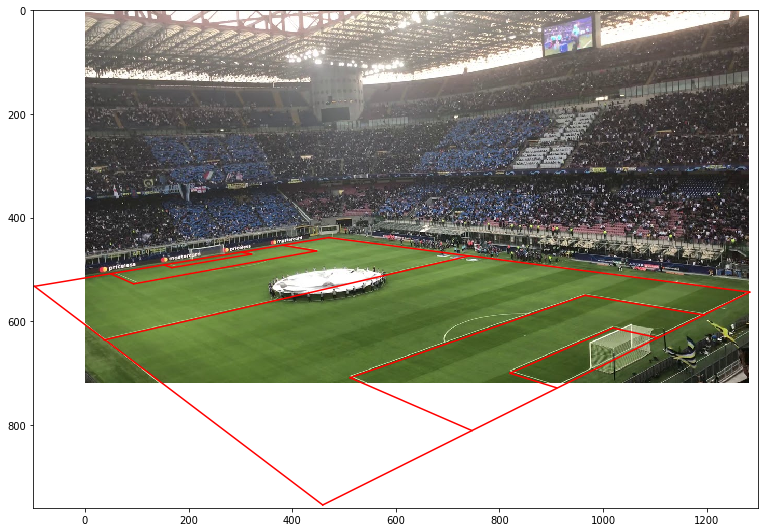

In [17]:
def draw_pitch_on_I():
    
    # vertical lines
    
    fig, ax = plt.subplots(figsize=(13,10))
    draw_line(A_new,B_new)
    draw_line(I_new,G_new)
    draw_line(F_new,E_new)
    draw_line(O_new,N_new)
    draw_line(D_new,C_new)
    draw_line(Q_new,P_new)
    draw_line(U_new,T_new)

    # horizontal lines
    
    draw_line(E_new,G_new)
    draw_line(F_new,I_new)
    draw_line(M_new,O_new)
    draw_line(L_new,N_new)
    draw_line(C_new,R_new)
    draw_line(D_new,S_new)
    draw_line(V_new,P_new)
    draw_line(W_new,Q_new)
    draw_line(T_new,J_new)
    draw_line(U_new,Y_new)
    ax.set_xlim([-100, 1300])
    ax.set_ylim([0, 960])
    ax.invert_yaxis()

    plt.imshow(image_I);
draw_pitch_on_I()

### ● Task3: <br><br> Define the centre circle ​C in the layout and map it to the image.

In [18]:
# center of the circle

print("Z on pitch", Z)
Z_new = np.array(H@Z).ravel()
Z_new = Z_new/Z_new[2]

# transformed center of the circle
print("Z' on image I", Z_new)

Z on pitch [576 391   1]
Z' on image I [467.2283078  537.29035945   1.        ]


Each conic can be represented with the following equation:
$$
𝑎𝑥^{2} + 𝑏𝑥𝑦 + 𝑐𝑦^{2} + 𝑑𝑥 + 𝑒𝑦 +𝑓 = 0
$$
To determine the 5 conic coefficients we need 5 of such equations (obtained using five points on the conic).<br>
Building the correct design matrix once again we obtain a system of the form:
$$
A𝒄 = 𝟎
$$
where $A$ corresponds to the design matrix built with the 5 points, and $c$ corresponds to the unknown coefficients of the conic $(a, b, c, d, e, f)$.<br>

We start by building the matrix A:

In [19]:
def C_estimation(points_circle):
    matrix_A = np.zeros((points_circle.shape[1],6))
    for col_idx in range(points_circle.shape[1]):
        row = np.array([points_circle[0,col_idx]**2,
                    points_circle[0,col_idx]*points_circle[1,col_idx],
                    points_circle[1,col_idx]**2,
                    points_circle[0,col_idx],
                    points_circle[1,col_idx],
                    1])  
        matrix_A[col_idx,:] = row
    return matrix_A

In [20]:
points_circle = np.array(list_points_circle).T
matrix_A_conic = C_estimation(points_circle)
# Matrix A shape: (5, 6)

In [21]:
# c = null_space(matrix_A_conic)
u, s, vh  = np.linalg.svd(matrix_A_conic) # nb vh is V^T
c = vh[-1,:] 
print('Coefficients c:\n', c)

Coefficients c:
 [ 2.09957536e-06  6.71359789e-19  2.09957536e-06 -2.41871082e-03
 -1.64186793e-03  9.99995727e-01]


And now we can arrange the coefficients retrieved above to find the matrix C:
$$
C = \begin{bmatrix}
    a & b/2 & d/2\\
    b/2 & c & e/2\\
    d/2 & e/2 & f
    \end{bmatrix}
$$

In [22]:
C_ = np.array([[c[0], c[1]/2, c[3]/2] ,
               [c[1]/2, c[2], c[4]/2], 
               [c[3]/2, c[4]/2 ,c[5]]])

# C_ = np.squeeze(C_, axis=2)
print('C MATRIX C OF THE CONIC IN THE PITCH S:')
print(np.around(C_, decimals = 5))
print('\n')
print('Sanity check with incidence relation: x.T @ C @ X = 0')
print('For point 1:', np.around(points_circle[:,0].T@ C_ @ points_circle[:,0], decimals = 3))
print('For point 2:', np.around(points_circle[:,1].T@ C_ @ points_circle[:,1], decimals = 3))
print('For point 3:', np.around(points_circle[:,2].T@ C_ @ points_circle[:,2], decimals = 3))
print('For point 4:', np.around(points_circle[:,3].T@ C_ @ points_circle[:,3], decimals = 3))
print('For point 5:', np.around(points_circle[:,4].T@ C_ @ points_circle[:,4], decimals = 3))


C MATRIX C OF THE CONIC IN THE PITCH S:
[[ 0.00e+00  0.00e+00 -1.21e-03]
 [ 0.00e+00  0.00e+00 -8.20e-04]
 [-1.21e-03 -8.20e-04  1.00e+00]]


Sanity check with incidence relation: x.T @ C @ X = 0
For point 1: -0.0
For point 2: -0.0
For point 3: 0.0
For point 4: 0.0
For point 5: -0.0


Now we apply the homography to the matrix C_ obtained above.
$$
C'=(H^{-1})^{T} C H^{-1}
$$

In [23]:
C_prime = np.linalg.inv(H).T @ C_ @ np.linalg.inv(H)
print("Matrix C' for the coninc (the ellipse) in image I\n", C_prime)

Matrix C' for the coninc (the ellipse) in image I
 [[ 4.52175222e-06  7.38905138e-06 -6.09352327e-03]
 [ 7.38905138e-06  8.10001676e-05 -4.71453127e-02]
 [-6.09352327e-03 -4.71453127e-02  2.82310480e+01]]


Finding all the needed coefficients, we have everything we need to 
DRAW THE CONIC using the following formulas to compute the minor/major axis and the rotation angle of the ellipse from the general equation:

In [24]:
from IPython.display import Image

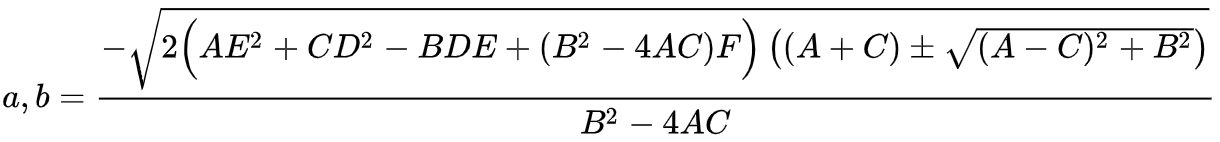

In [25]:
Image(filename ="a_b.png", width=1000, height=1000)


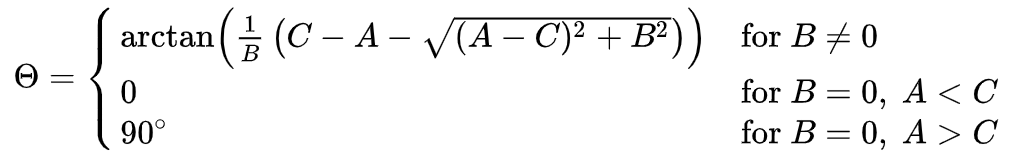

In [26]:
Image(filename ="rot.png", width=1000, height=1000)

In [27]:
A_conic = C_prime[0,0]
B_conic = C_prime[0,1]*2.
C_conic = C_prime[1,1]
D_conic = C_prime[0,2]*2.
E_conic = C_prime[1,2]*2.
F_conic = C_prime[2,2]

term0=(A_conic*(E_conic)**2)+(C_conic*(D_conic)**2)-(B_conic*D_conic*E_conic)+((B_conic)**2-4*A_conic*C_conic)*F_conic
term1=((A_conic+C_conic)+np.sqrt((A_conic-C_conic)**2+B_conic**2))
term1BIS=((A_conic+C_conic)-np.sqrt((A_conic-C_conic)**2+B_conic**2))
term2 = (B_conic**2-4*A_conic*C_conic)
a = (-np.sqrt(2*term0*term1))/term2
b = (-np.sqrt(2*term0*term1BIS))/term2
t_rot = np.arctan((1/B_conic)*(C_conic-A_conic-np.sqrt((A_conic-C_conic)**2+B_conic**2)))


And finally, after defining the centre circle C in the layout, we mapped it to the image and this is the final result:

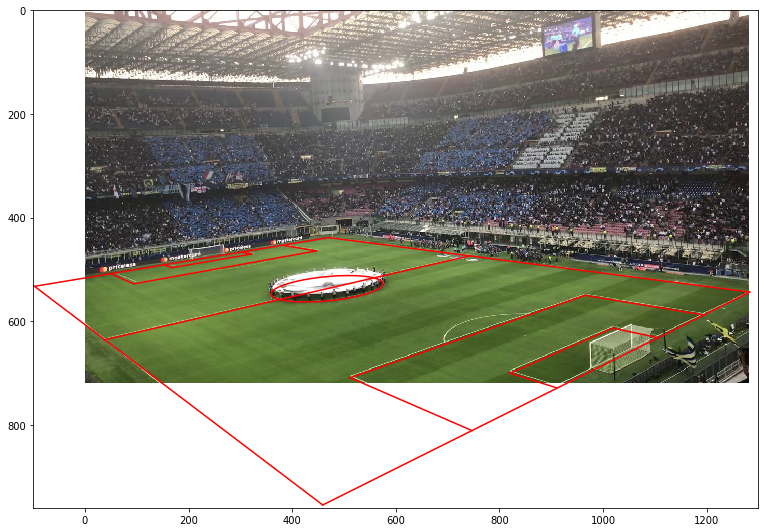

In [28]:
draw_pitch_on_I()
draw_ellipse(Z_new[0],Z_new[1],t_rot,a,b)

### ● Task4: <br><br>Look for another picture J of Stadio Meazza (possibly partially occluded), and repeat the whole process

Since we are repeating the whole process done for the Image I on our Image J, there is no need to comment on the each of the steps again, so we will only coment on the results obtained (as requested in the text of the task).<br>

Loading the new Image J.

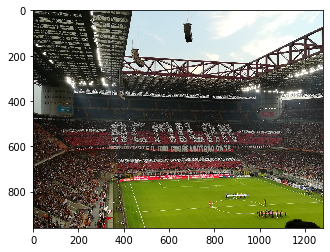

In [29]:
image_J = plt.imread('J.jpg')
plt.imshow(image_J);

Saving the point coordinates of the Image J.

In [30]:
### POINTS FROM S ###
# points that we are going to use to estimate the homography

F = np.array([50, 731, 1])
O = np.array([215, 593, 1])
E = np.array([50, 50, 1])
N = np.array([214, 189, 1])

# all the other points in S

A = np.array([576, 731, 1])
B = np.array([575, 52, 1])
C = np.array([935, 190, 1])
D = np.array([935, 593, 1])
G = np.array([1100, 51, 1])
I = np.array([1101, 729, 1])
L = np.array([50, 189, 1])
M = np.array([50, 593, 1])
P = np.array([104, 299, 1])
Q = np.array([105, 484, 1])
R = np.array([1101, 190, 1])
S = np.array([1101, 593, 1])
T = np.array([1045, 300, 1])
U = np.array([1046, 483, 1])
V = np.array([51, 300, 1])
W = np.array([51, 483, 1])
J = np.array([1100, 301, 1])
Y = np.array([1100, 483, 1])

# center of the circle on the half-way line of the pitch:
Z = np.array([576, 391, 1])

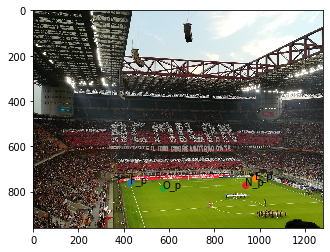

In [31]:
### POINTS FROM J ###

F_p = np.array([427, 757, 1.])
E_p = np.array([980, 740, 1.])
O_p = np.array([573, 782, 1.])
N_p = np.array([936, 769, 1.])


plt.annotate('F_p', F_p[:2])
plt.scatter(F_p[0], F_p[1])
plt.annotate('E_p', E_p[:2])
plt.scatter(E_p[0], E_p[1])
plt.annotate('O_p', O_p[:2])
plt.scatter(O_p[0], O_p[1])
plt.annotate('N_p', N_p[:2])
plt.scatter(N_p[0], N_p[1])
plt.imshow(image_J);


In [32]:
pts_pitch = [F, E, O, N] # from img(S)
X = np.array(pts_pitch).T # from img(S)

pts_image = [F_p, E_p, O_p, N_p] # from img(J)
X_p = np.array(pts_image).T # from img(J)

In [33]:
A_ = build_matrix_A(X, X_p, preconditioning = False)
H = estimate_homography(A_)
print('Homography H:\n', H)

Homography H:
 [[ 1.56698497e-04  6.74182634e-04 -8.05930032e-01]
 [ 2.43543073e-04  5.28644804e-05 -5.92009788e-01]
 [ 4.73332427e-07  9.55554674e-08 -8.08430084e-04]]


With the newly estimated H, we can find the transformed points of the pitch in the image J:

In [34]:
# new points

E_new = np.array(H@E).ravel()
L_new = np.array(H@L).ravel()
V_new = np.array(H@V).ravel()
W_new = np.array(H@W).ravel()
M_new = np.array(H@M).ravel()
F_new = np.array(H@F).ravel()
N_new = np.array(H@N).ravel()
O_new = np.array(H@O).ravel()
P_new = np.array(H@P).ravel()
Q_new = np.array(H@Q).ravel()
A_new = np.array(H@A).ravel()
B_new = np.array(H@B).ravel()
G_new = np.array(H@G).ravel()
C_new = np.array(H@C).ravel()
R_new = np.array(H@R).ravel()
J_new = np.array(H@J).ravel()
T_new = np.array(H@T).ravel()
U_new = np.array(H@U).ravel()
Y_new = np.array(H@Y).ravel()
D_new = np.array(H@D).ravel()
S_new = np.array(H@S).ravel()
I_new = np.array(H@I).ravel()

# normalizing

E_new = E_new/E_new[2]
L_new = L_new/L_new[2]
V_new = V_new/V_new[2]
W_new = W_new/W_new[2]
M_new = M_new/M_new[2]
F_new = F_new/F_new[2]
N_new = N_new/N_new[2]
O_new = O_new/O_new[2]
P_new = P_new/P_new[2]
Q_new = Q_new/Q_new[2]
A_new = A_new/A_new[2]
B_new = B_new/B_new[2]
G_new = G_new/G_new[2]
C_new = C_new/C_new[2]
R_new = R_new/R_new[2]
J_new = J_new/J_new[2]
T_new = T_new/T_new[2]
U_new = U_new/U_new[2]
Y_new = Y_new/Y_new[2]
D_new = D_new/D_new[2]
S_new = S_new/S_new[2]
I_new = I_new/I_new[2]

After projecting S onto J, we can see that the transformation mapped the lines perfectly.

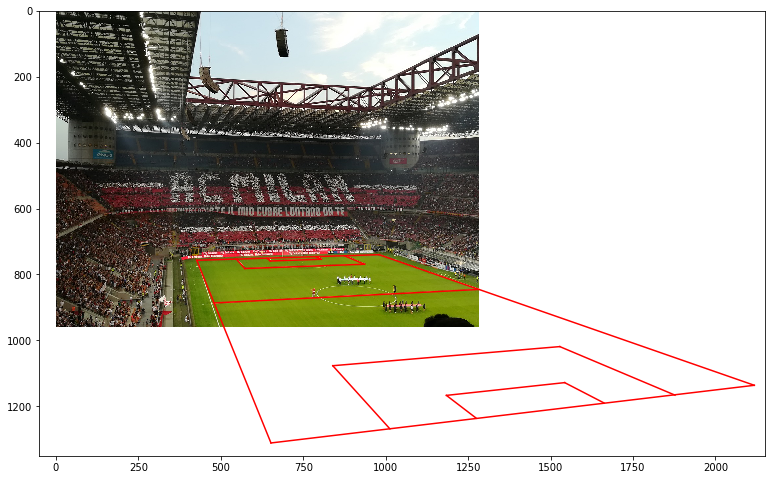

In [35]:
def draw_pitch_on_J():
    
    fig, ax = plt.subplots(figsize=(13,10))
    
    # vertical lines
    
    draw_line(A_new,B_new)
    draw_line(I_new,G_new)
    draw_line(F_new,E_new)
    draw_line(O_new,N_new)
    draw_line(D_new,C_new)
    draw_line(Q_new,P_new)
    draw_line(U_new,T_new)

    # horizontal lines
    
    draw_line(E_new,G_new)
    draw_line(F_new,I_new)
    draw_line(M_new,O_new)
    draw_line(L_new,N_new)
    draw_line(C_new,R_new)
    draw_line(D_new,S_new)
    draw_line(V_new,P_new)
    draw_line(W_new,Q_new)
    draw_line(T_new,J_new)
    draw_line(U_new,Y_new)
    ax.set_xlim([-50, 2150])
    ax.set_ylim([0, 1350])
    ax.invert_yaxis()
    
    plt.imshow(image_J)
draw_pitch_on_J()

We are going to map the circle along the mapped lines. If we look at the output result, we see that the circle of the pitch S, like the lines, was mapped correctly onto our new Image J.

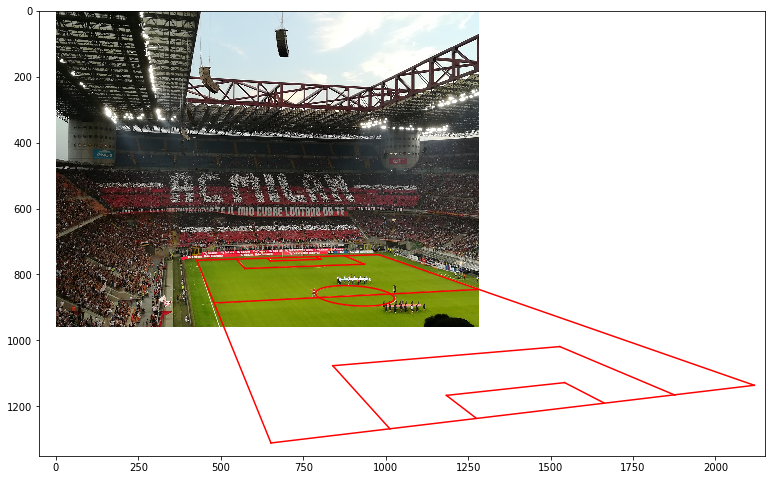

In [36]:
Z_new_new = np.array(H@Z).ravel()
Z_new_new = Z_new_new/Z_new_new[2]

def C_estimation(points_circle):
    matrix_A = np.zeros((points_circle.shape[1],6))
    for col_idx in range(points_circle.shape[1]):
        row = np.array([points_circle[0,col_idx]**2,
                    points_circle[0,col_idx]*points_circle[1,col_idx],
                    points_circle[1,col_idx]**2,
                    points_circle[0,col_idx],
                    points_circle[1,col_idx],
                    1])  
        matrix_A[col_idx,:] = row
    return matrix_A

points_circle = np.array(list_points_circle).T
matrix_A_conic = C_estimation(points_circle)
u, s, vh  = np.linalg.svd(matrix_A_conic) 
c = vh[-1,:]

C_ = np.array([[c[0], c[1]/2, c[3]/2] ,
               [c[1]/2, c[2], c[4]/2], 
               [c[3]/2, c[4]/2 ,c[5]]])

C_prime_prime = np.linalg.inv(H).T @ C_ @ np.linalg.inv(H)

A_conic = C_prime_prime[0,0]
B_conic = C_prime_prime[0,1]*2.
C_conic = C_prime_prime[1,1]
D_conic = C_prime_prime[0,2]*2.
E_conic = C_prime_prime[1,2]*2.
F_conic = C_prime_prime[2,2]

term0=(A_conic*(E_conic)**2)+(C_conic*(D_conic)**2)-(B_conic*D_conic*E_conic)+((B_conic)**2-4*A_conic*C_conic)*F_conic
term1=((A_conic+C_conic)+np.sqrt((A_conic-C_conic)**2+B_conic**2))
term1BIS=((A_conic+C_conic)-np.sqrt((A_conic-C_conic)**2+B_conic**2))
term2 = (B_conic**2-4*A_conic*C_conic)
a = (-np.sqrt(2*term0*term1))/term2
b = (-np.sqrt(2*term0*term1BIS))/term2
t_rot = np.arctan((1/B_conic)*(C_conic-A_conic-np.sqrt((A_conic-C_conic)**2+B_conic**2)))

draw_pitch_on_J()
draw_ellipse(Z_new_new[0],Z_new_new[1],t_rot,a,b)

## Comment the results <br>
As we can see the image that we used to replicate the results presents a deeper perspective then the original one, and this is highlited from the different scale of the furthest/clostes part of the pitch. Furthermore we suspect that the perspective distortion in slightly increased due to the fact that we picked points close to each other in the image J (and thus even for a small error we could have a big impact on the image result).

# Single View Geometry B: (3 pts)


### ● Task :Repeat the transformation fitting process by providing line correspondences as input instead of point correspondences. <br>
To begin with we need to select 4 pairs of lines, between the corresponding images (S and I). To begin with we will select the points that we are going to use to define the lines:

In [37]:
### POINTS FROM S: ###

A = np.array([575, 731, 1])
B = np.array([575, 52, 1])
C = np.array([935, 190, 1])
D = np.array([935, 593, 1])

### POINTS FROM I: ###

A_p = np.array([37, 636, 1])
B_p = np.array([742, 474, 1])
C_p = np.array([965, 550, 1])
D_p = np.array([512, 709, 1])

Since we were not allowed to intersect lines or to use the point-estimation procedure, we have built a function _slope_intercept_ which builds a line directly from the line equation.

In [38]:
def slope_intercept(x1, y1, x2, y2): 
    if (y2 - y1) == 0: #if y is constant -> horizontal line
        return np.array([0, -1, y1]) #or equivalently 0, 1, -y1(or -y2)
    elif (x2 - x1) == 0: #if x is constant -> vertical line
        return np.array([-1, 0, x1]) #or equivalently 1, 0, -x1(or -x2)
    else:
        a = (y2 - y1) / (x2 - x1) #slope    
        b = -1
        c = y1 - a * x1
    
        line = a, b, c

        return np.array(line)

# let's find the lines in S:

AB_pitch = slope_intercept(A[0],A[1],B[0],B[1])
AD_pitch = slope_intercept(A[0],A[1],D[0],D[1])
BC_pitch = slope_intercept(B[0],B[1],C[0],C[1])
CD_pitch = slope_intercept(C[0],C[1],D[0],D[1])

# and let's find the lines in I

AB_im = slope_intercept(A_p[0], A_p[1], B_p[0], B_p[1])
AD_im = slope_intercept(A_p[0], A_p[1], D_p[0], D_p[1])
BC_im = slope_intercept(B_p[0], B_p[1], C_p[0], C_p[1])
CD_im = slope_intercept(C_p[0], C_p[1], D_p[0], D_p[1])

lines_pitch = [AD_pitch/AD_pitch[2], AB_pitch/AB_pitch[2], BC_pitch/BC_pitch[2], CD_pitch/CD_pitch[2]]
lines_im = [AD_im/AD_im[2], AB_im/AB_im[2], BC_im/BC_im[2], CD_im/CD_im[2]]

# let's take the above lists, transform them into arrays and transpose them 
lines_s = np.array(lines_pitch).T
lines_p = np.array(lines_im).T


#### Non-pointwise Homography estimation:

We have to build the design matrix A again, but this time it is built differently since instead of points now, we are working with lines. Afterwards we will estimate the Homography the same way we did in the previous exercise (using the same function *estimate_homography()*).<br>
The matrix A should be built as follows:
$$ 
A_i = \begin{bmatrix}
    -u & 0 & ux & -v & 0 & vx & -1 & 0 & x \\
    0 & -u & uy & 0 & -v & vy & 0 & -1 & y 
    \end{bmatrix}
$$
<br>
where: $𝐥_𝑖=(𝑢,𝑣,1)^{T}$ = line in **S**, and $𝐥^{′}_{𝑖}=(𝑥,𝑦,1)^{𝑇}$, line in **I**.
<br> For each pair of lines we have 2 equations and thus, we can use the SVD decomposition again to find the vector $h$ s.t. 
$$Ah=0$$

ref: https://dsp.stackexchange.com/questions/6112/calculating-a-homography-based-on-detected-lines


In [39]:
def build_A_lines(lines_p, lines_s):    
    '''
    As we can see the function takes as input only line coefficients
    '''
    A = None
    for i in range(lines_p.shape[1]):
        x = lines_p[0,i] 
        y = lines_p[1,i]
        u = lines_s[0,i]
        v = lines_s[1,i]
        res = np.array([[-u, 0, u*x, -v, 0, v*x, -1, 0, x],
                        [0, -u, u*y, 0, -v, v*y, 0, -1, y]])
        if i == 0:
            A = res
        else:
            A = np.vstack([A, res])
    return A

With the above function we retrieve the matrix A of shape: (8, 9).

In [40]:
A_task_b = build_A_lines(lines_p, lines_s)
print('A shape:', A_task_b.shape, ' =>8 dof and 8 equations, we can solve the system.')

A shape: (8, 9)  =>8 dof and 8 equations, we can solve the system.


And now we estimate the homography we the newly defined A (gathered only using lines).

In [41]:
H_task_b = estimate_homography(A_task_b).T
print(f'Homography H: a {H_task_b.shape} invertible non-singular matrix. (det={np.linalg.det(H_task_b)})')

Homography H: a (3, 3) invertible non-singular matrix. (det=-1.0893066145214735e-10)


We can now indeed use the new matrix to reproduce the same result obtained above:

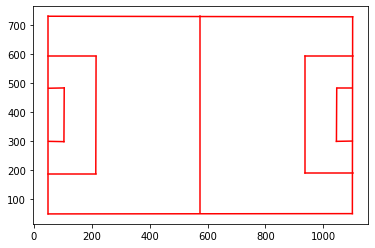

In [42]:
# here we compute the lines that define the pitch

# vertical

lAB = draw_line(A,B)
lIG = draw_line(I,G)
lFE = draw_line(F,E)
lON = draw_line(O,N)
lDC = draw_line(D,C)
lQP = draw_line(Q,P)
lUT = draw_line(U,T)

# horizontal

lEG = draw_line(E,G)
lFI = draw_line(F,I)
lMO = draw_line(M,O)
lLN = draw_line(L,N)
lCR = draw_line(C,R)
lDS = draw_line(D,S)
lVP = draw_line(V,P)
lWQ = draw_line(W,Q)
lTJ = draw_line(T,J)
lUY = draw_line(U,Y)


Following the steps explained in the non-pointwise homography estimation, relationship between lines in two images become:
$$
l' = H^{T} l
$$
<br>
Along with the transformed lines of the pitch, we draw the elipse as well.


Matrix C' for the coninc (the ellipse) in image I
 [[ 1.82951672e-13  2.99512194e-13 -2.46871762e-10]
 [ 2.99512194e-13  3.26990195e-12 -1.90433390e-09]
 [-2.46871762e-10 -1.90433390e-09  1.14098633e-06]]


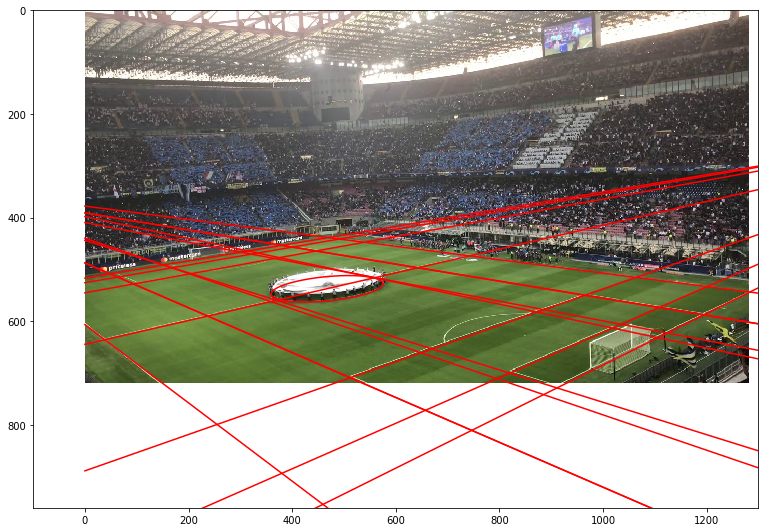

In [43]:
'''
New points; 
NOTE: we are using H_task_b (defined a couple of cells above) instead of H
'''

# vertical

lAB_new = np.array(H_task_b@lAB).ravel()
lIG_new = np.array(H_task_b@lIG).ravel()
lFE_new = np.array(H_task_b@lFE).ravel()
lON_new = np.array(H_task_b@lON).ravel()
lDC_new = np.array(H_task_b@lDC).ravel()
lQP_new = np.array(H_task_b@lQP).ravel()
lUT_new = np.array(H_task_b@lUT).ravel()

# normalization

lAB_new= lAB_new/lAB_new[2]
lIG_new= lIG_new/lIG_new[2]
lFE_new= lFE_new/lFE_new[2]
lON_new= lON_new/lON_new[2]
lDC_new= lDC_new/lDC_new[2]
lQP_new= lQP_new/lQP_new[2]
lUT_new= lUT_new/lUT_new[2]

#horizontal

lEG_new = np.array(H_task_b@lEG).ravel()
lFI_new = np.array(H_task_b@lFI).ravel()
lMO_new = np.array(H_task_b@lMO).ravel()
lLN_new = np.array(H_task_b@lLN).ravel()
lCR_new = np.array(H_task_b@lCR).ravel()
lDS_new = np.array(H_task_b@lDS).ravel()
lVP_new = np.array(H_task_b@lVP).ravel()
lWQ_new = np.array(H_task_b@lWQ).ravel()
lTJ_new = np.array(H_task_b@lTJ).ravel()
lUY_new = np.array(H_task_b@lUY).ravel()

# normalization

lEG_new= lEG_new/lEG_new[2]
lFI_new= lFI_new/lFI_new[2]
lMO_new= lMO_new/lMO_new[2]
lLN_new= lLN_new/lLN_new[2]
lCR_new= lCR_new/lCR_new[2]
lDS_new= lDS_new/lDS_new[2]
lVP_new= lVP_new/lVP_new[2]
lWQ_new= lWQ_new/lWQ_new[2]
lTJ_new= lTJ_new/lTJ_new[2]
lUY_new= lUY_new/lUY_new[2]

'''
NOTE: here we are using the second draw line function which instead of points as 
parameters, is taking lines
'''

fig, ax = plt.subplots(figsize=(13,10))
draw_line_line(lAB_new)
draw_line_line(lIG_new)
draw_line_line(lFE_new)
draw_line_line(lON_new)
draw_line_line(lDC_new)
draw_line_line(lQP_new)
draw_line_line(lUT_new)
draw_line_line(lEG_new)
draw_line_line(lFI_new)
draw_line_line(lMO_new)
draw_line_line(lLN_new)
draw_line_line(lCR_new)
draw_line_line(lDS_new)
draw_line_line(lVP_new)
draw_line_line(lWQ_new)
draw_line_line(lTJ_new)
draw_line_line(lUY_new)

C_prime = H_task_b @ C_ @ H_task_b.T

print("Matrix C' for the coninc (the ellipse) in image I\n", C_prime)

A_conic = C_prime[0,0]
B_conic = C_prime[0,1]*2.
C_conic = C_prime[1,1]
D_conic = C_prime[0,2]*2.
E_conic = C_prime[1,2]*2.
F_conic = C_prime[2,2]

term0=(A_conic*(E_conic)**2)+(C_conic*(D_conic)**2)-(B_conic*D_conic*E_conic)+((B_conic)**2-4*A_conic*C_conic)*F_conic
term1=((A_conic+C_conic)+np.sqrt((A_conic-C_conic)**2+B_conic**2))
term1BIS=((A_conic+C_conic)-np.sqrt((A_conic-C_conic)**2+B_conic**2))
term2 = (B_conic**2-4*A_conic*C_conic)

a = (-np.sqrt(2*term0*term1))/term2
b = (-np.sqrt(2*term0*term1BIS))/term2
t_rot = np.arctan((1/B_conic)*(C_conic-A_conic-np.sqrt((A_conic-C_conic)**2+B_conic**2)))

draw_ellipse(Z_new[0],Z_new[1],t_rot,a,b)

ax.set_xlim([-100, 1300])
ax.set_ylim([0, 960])
ax.invert_yaxis()

plt.imshow(image_I);


As you can see above we decided to define the lines of the pitch using straight lines instead of the segments as we have done in the task before, to underline the fact that in this exercise we are building everything without points.

# Single View Geometry C: (5 pts + 1 bonus)

### ● Task: Given two pictures I1 and I2 of the opposite sides of the Stadio Meazza, Milano, reconstruct the full pitch by stitching the two pictures.
#### Task1: Map the two images I1 and I2 over the provided pitch scheme S.
#### Task2: Stitch the two transformed images by selecting in each pixel of the output image the color form I1 or I2. 

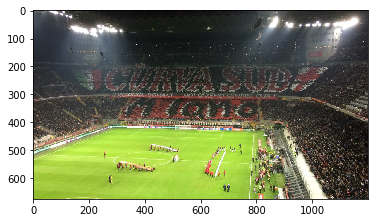

In [44]:
image_I2 = plt.imread('I2.jpg')
plt.imshow(image_I2);

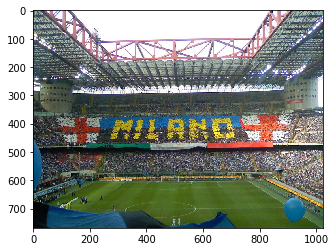

In [45]:
image_I1 = plt.imread('I1.jpg')
plt.imshow(image_I1);

We want to map the two images to the scheme S, hence we repeat the process of selecting 4 points correspondecies.
In both the images and we apply the estimated transformation to obtain the 2 images that are going to be inputs for the 'stitching' procecedure (Task2).

In [46]:
### POINTS FROM S: ###
#for pt correspondence with I2

E_p = np.array([50, 50, 1.])
F_p = np.array([50, 730, 1.])
N_p = np.array([215, 190, 1.])
O_p = np.array([215, 595, 1.])

#for pt correspondence with I1

G_p = np.array([1100, 50, 1.])
I_p = np.array([1100, 730, 1.])
C_p = np.array([935, 190, 1.])
D_p = np.array([935, 595, 1.])

In [47]:
### POINTS FROM I2: ###

E = np.array([790, 439, 1]) 
F = np.array([298, 425, 1.]) 
N = np.array([669, 459, 1.]) 
O = np.array([346, 448, 1.]) 

In [48]:
### POINTS FROM I1: ###

G = np.array([211, 608, 1])
I = np.array([762, 604, 1.])
C = np.array([292, 628, 1.])
D = np.array([664, 625, 1.])

In [49]:
pts_pitch = [E_p, F_p, N_p, O_p] # from img(S)
X_p_2 = np.array(pts_pitch).T # from img(S)

pts_image = [E, F, N, O] # from img(I2)
X_2 = np.array(pts_image).T # from img(I2)

pts_pitch1 = [G_p, I_p, C_p, D_p]# from img(S)
X_p_1 = np.array(pts_pitch1).T # from img(S)

pts_image1 = [G, I, C, D] # from img(I1)
X_1 = np.array(pts_image1).T # from img(I1)

In [50]:
A_2 = build_matrix_A(X_2, X_p_2)
H_2 = estimate_homography(A_2)
H_2 = np.asmatrix(H_2)

In [51]:
print(image_I2.shape)
print(image_S.shape)

(675, 1200, 3)
(781, 1151)


In [52]:
def imwarpLinear2(img_target, img_source, H): # img_target = S, img_source = I

    H_inv = np.linalg.inv(H)    

    source_shape = img_source.shape # (675, 1200, 3) RGB
    target_shape = img_target.shape # (781, 1151) gray scale = shape of the pitch 
    
    result = np.zeros((target_shape[0], target_shape[1], 3), dtype=int) # with RGB channels
                      
    for i in range(target_shape[0]): 
        for j in range(target_shape[1]):

            current_coord = np.array([j, i ,1.]) # <====[y,x,1]
            xP = np.array(H_inv@current_coord).ravel()
            xP = xP/xP[2] # standardize
            x = int(xP[0]) # new x coord
            y = int(xP[1]) # new y coord
            
            if 0<= y < source_shape[0] and 0<= x <source_shape[1]: # only positive and in the image range
                result[i][j] = img_source[y][x]  

    return np.array(result)

(781, 1151, 3)

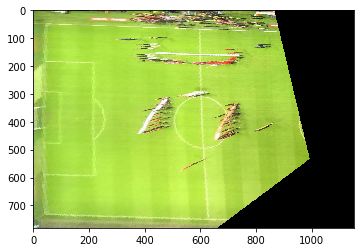

In [53]:
result1 = imwarpLinear2(img_target = image_S, img_source = image_I2, H = H_2)
plt.imshow(result1)
result1.shape # check if same target shape: they must be (781, 1151) + RGB

And now we repeat the process for image_I1

In [54]:
A_1 = build_matrix_A(X_1, X_p_1)
H_1 = estimate_homography(A_1)
H_1 = np.asmatrix(H_1)

In [55]:
print(image_I1.shape)
print(image_S.shape)

(768, 1024, 3)
(781, 1151)


(781, 1151, 3)

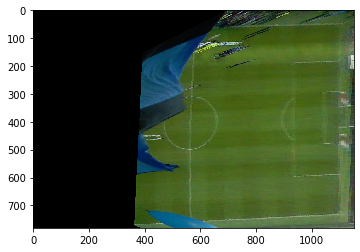

In [56]:
result2 = imwarpLinear2(img_target = image_S, img_source = image_I1, H = H_1)
plt.imshow(result2)
result2.shape

Here, we take both the transformed images from above, go trough all the pixels and get the average intesity. Then we compare the pixel intensities of both the images (for every pixel) and take the highest intensity. We are saving all the values in an array which is of the same size as the target image -> pitch S.

(781, 1151, 3)

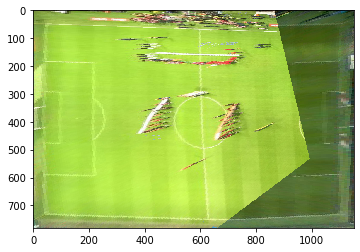

In [59]:
def stitch_together(im1,im2, target_image = image_S ):
    
    desired_shape = image_S.shape # n.b: here we have jup notation:(781, 1151)
    im1_shape = im1.shape # here we have the jup notation: (768, 1024, 3)
    im2_shape = im2.shape # here we have the jup notation: (675, 1200, 3)
    
    # let's identify for each pixel in the portion of image_I2, the average pixel intensity:
    result = np.zeros((desired_shape[0],desired_shape[1],3), dtype = int)
    for i in range(im1_shape[0]): 
        for j in range(im1_shape[1]): 
            intensity_1 = np.mean(im1[i][j]) # mean on the third axis
            intensity_2 = np.mean(im2[i][j]) # mean on the third axis    
            
            if intensity_1>= intensity_2:
                result[i][j] = im1[i][j]
            else:
                result[i][j] = im2[i][j]
    return np.array(result)        
            
final_result = stitch_together(im1=result1,im2=result2, target_image = image_S )
plt.imshow(final_result)
final_result.shape # check if same target shape: they must be (781, 1151, 3)